# 품질 등급화(Quality Rating Analysis)

## 문제 상황  

A공장에서는 매 달 품질검사를 통해 정상품 와인을 등급별로 출하한다. 품질(Quality)로 일정한 맛의 Wine을 출하하도록 노력하지만, 소비자 측에서 맛에 대한 클레임(필드 불량)이 종종 발생하는 VOC가 수집되고 있다. 맛의 변화를 일으키는 원인을 찾고 일정한 맛으로 Wine을 생산하고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 동일 품질(Quality) Wine에 일정하지 않은 맛

2. 기대효과

- 동일 품질(Quality) Wine에 일정한 맛, 필드 불량 감소, 고객 Claim 감소 

3. 해결방안

- Wine 생산 공정 변수 중 맛의 변화를 일으키는 주요 인자 도출 및 Control

4. 성과측정

- 주요인자 Control 전/후 필드 불량률 비교, 생산 공정 Target spec을 Tight하게 적용 했을 때 기존 대비 검사 통과율 비교

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/품질 등급화/품질 등급화_red.csv', sep=';')
df2 = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/품질 등급화/품질 등급화_white.csv', sep=';')

df=pd.concat([df1, df2], axis=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 모든 변수에 결측치가 존재하지 않는다.

- 만약, 결측치의 개수가 전체 5% 미만이면 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- int64형태 1개, float64형태 11개로 구성되어 있다.

3. 컬럼 설명

- fixed acidity : 산도
- volatile acidity : 휘발선상
- citric acid : 시트르산
- residual sugar : 잔당
- chlorides : 염화물
- free sulfur dioxide : 독립 이산화황
- total sulfur dioxide : 총 이산화항
- density : 밀도
- pH : 수소이온농도
- sulphates : 황산염
- alcohol : 도수
- quality : 품질

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다

이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다

In [5]:
outlier = pd.melt(df, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,fixed acidity,7.4
1,fixed acidity,7.8
2,fixed acidity,7.8
3,fixed acidity,11.2
4,fixed acidity,7.4
...,...,...
77959,quality,6.0
77960,quality,5.0
77961,quality,6.0
77962,quality,7.0


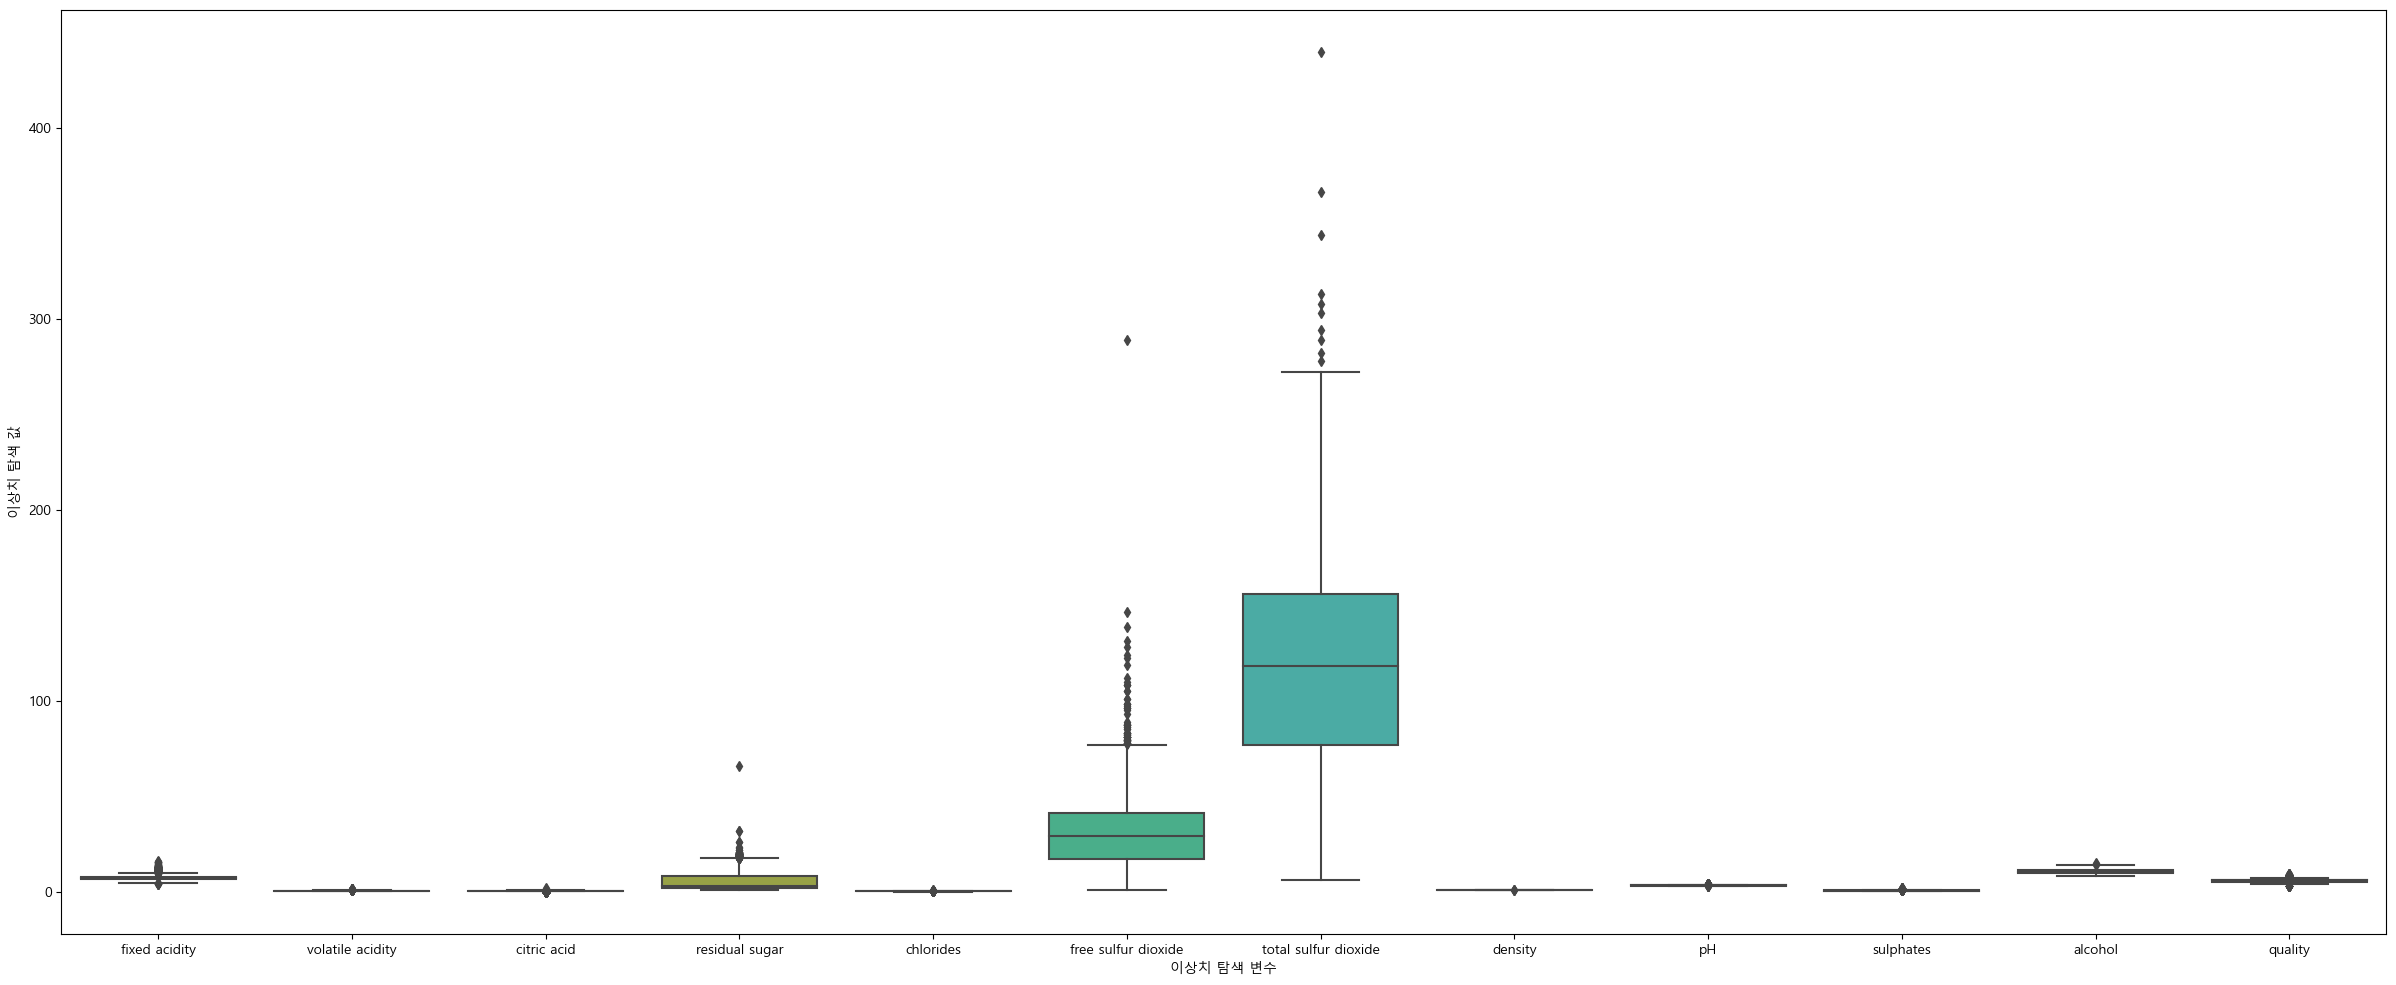

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (30,12))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(12), df.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

### 품질 데이터 탐색

In [7]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Wine 품질별 데이터를 확인한 결과, 고품질에 Data는 많지 않은 것을 알 수 있다

In [8]:
import numpy as np
df['quality'] = np.where(df['quality']<=5, 1, np.where(df['quality']==6, 2, 3))
df['quality'].value_counts()

2    2836
1    2384
3    1277
Name: quality, dtype: int64

분석을 하기 위한 충분한 Data가 없기 때문에 Quality를 그룹핑한다  

- 3,4,5 → 1(Low) 

- 6 → 2(Medium) 

- 7,8,9 → 3(High)

In [9]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


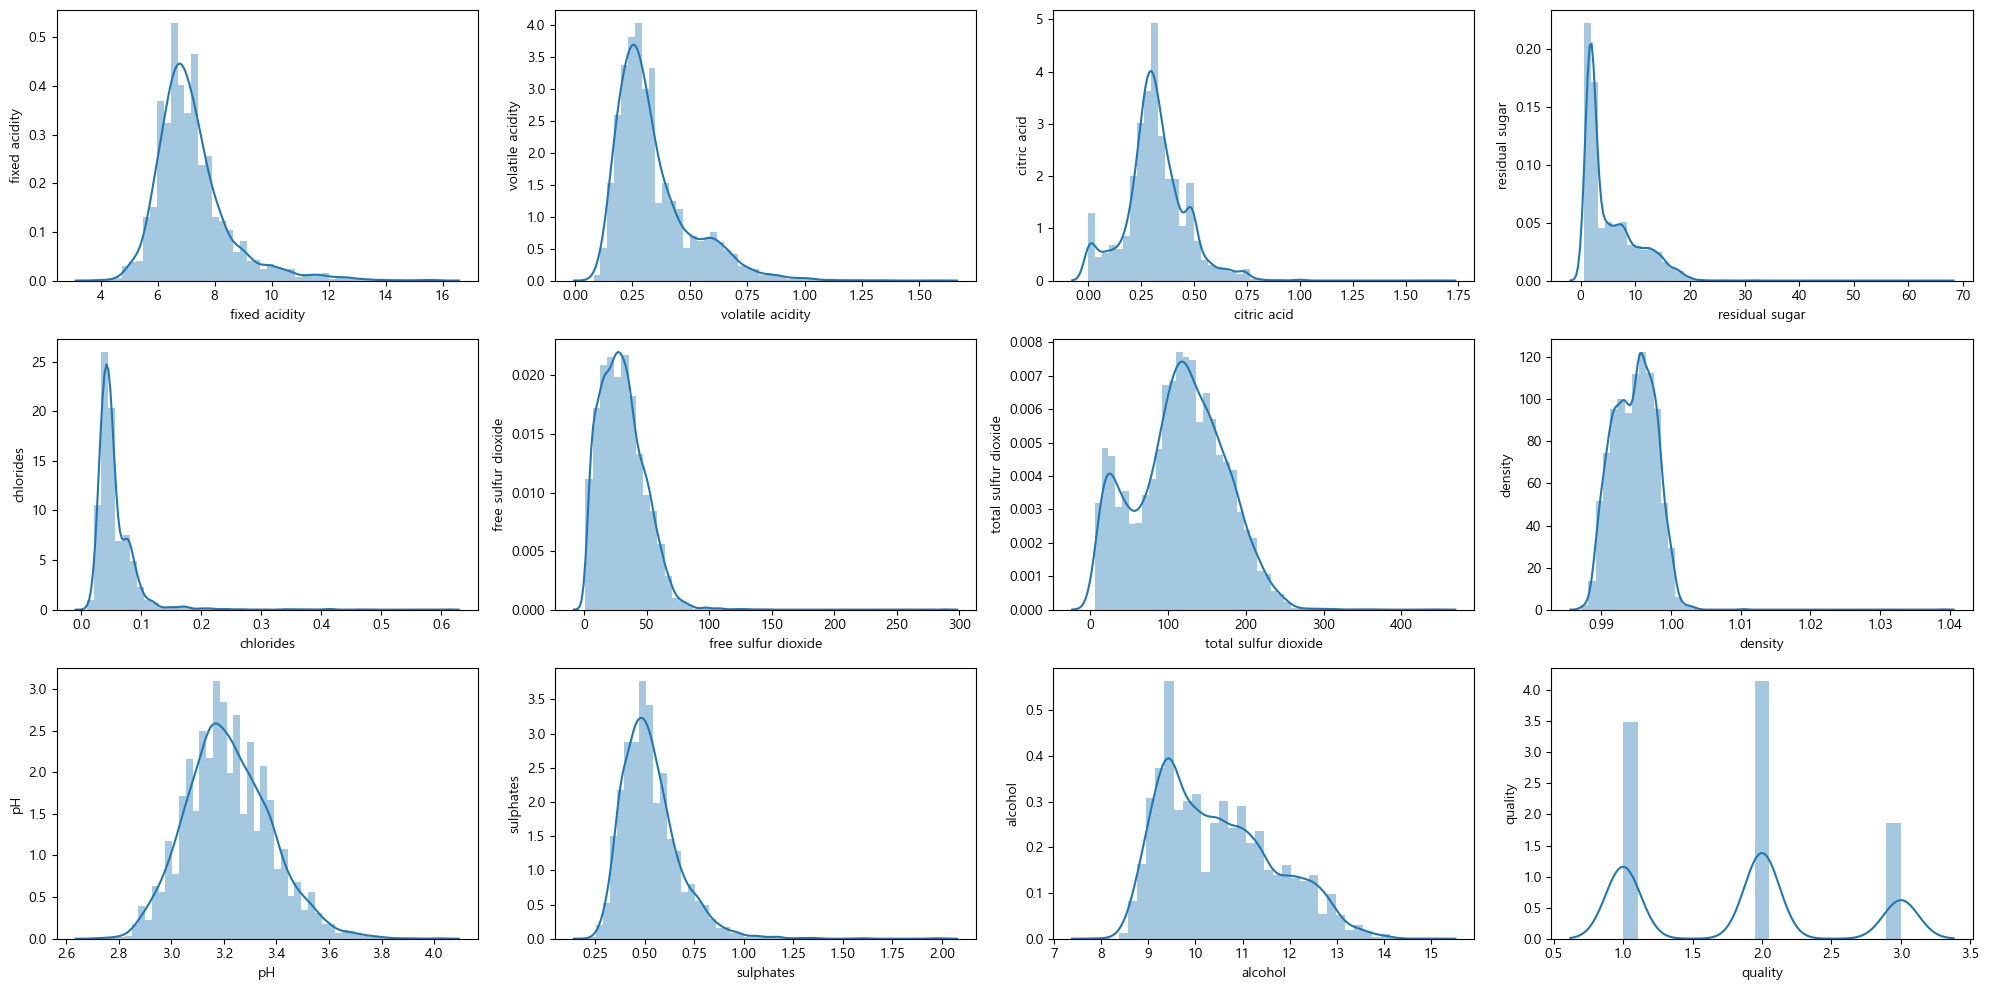

In [14]:
for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])
    plt.ylabel(df.columns[i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

전체 데이터 산포를 확인한 결과, 주로 한쪽으로 치우친 분포가 대부분이고 PH는 정규분포 형태를 띄고 있음을 알 수 있다

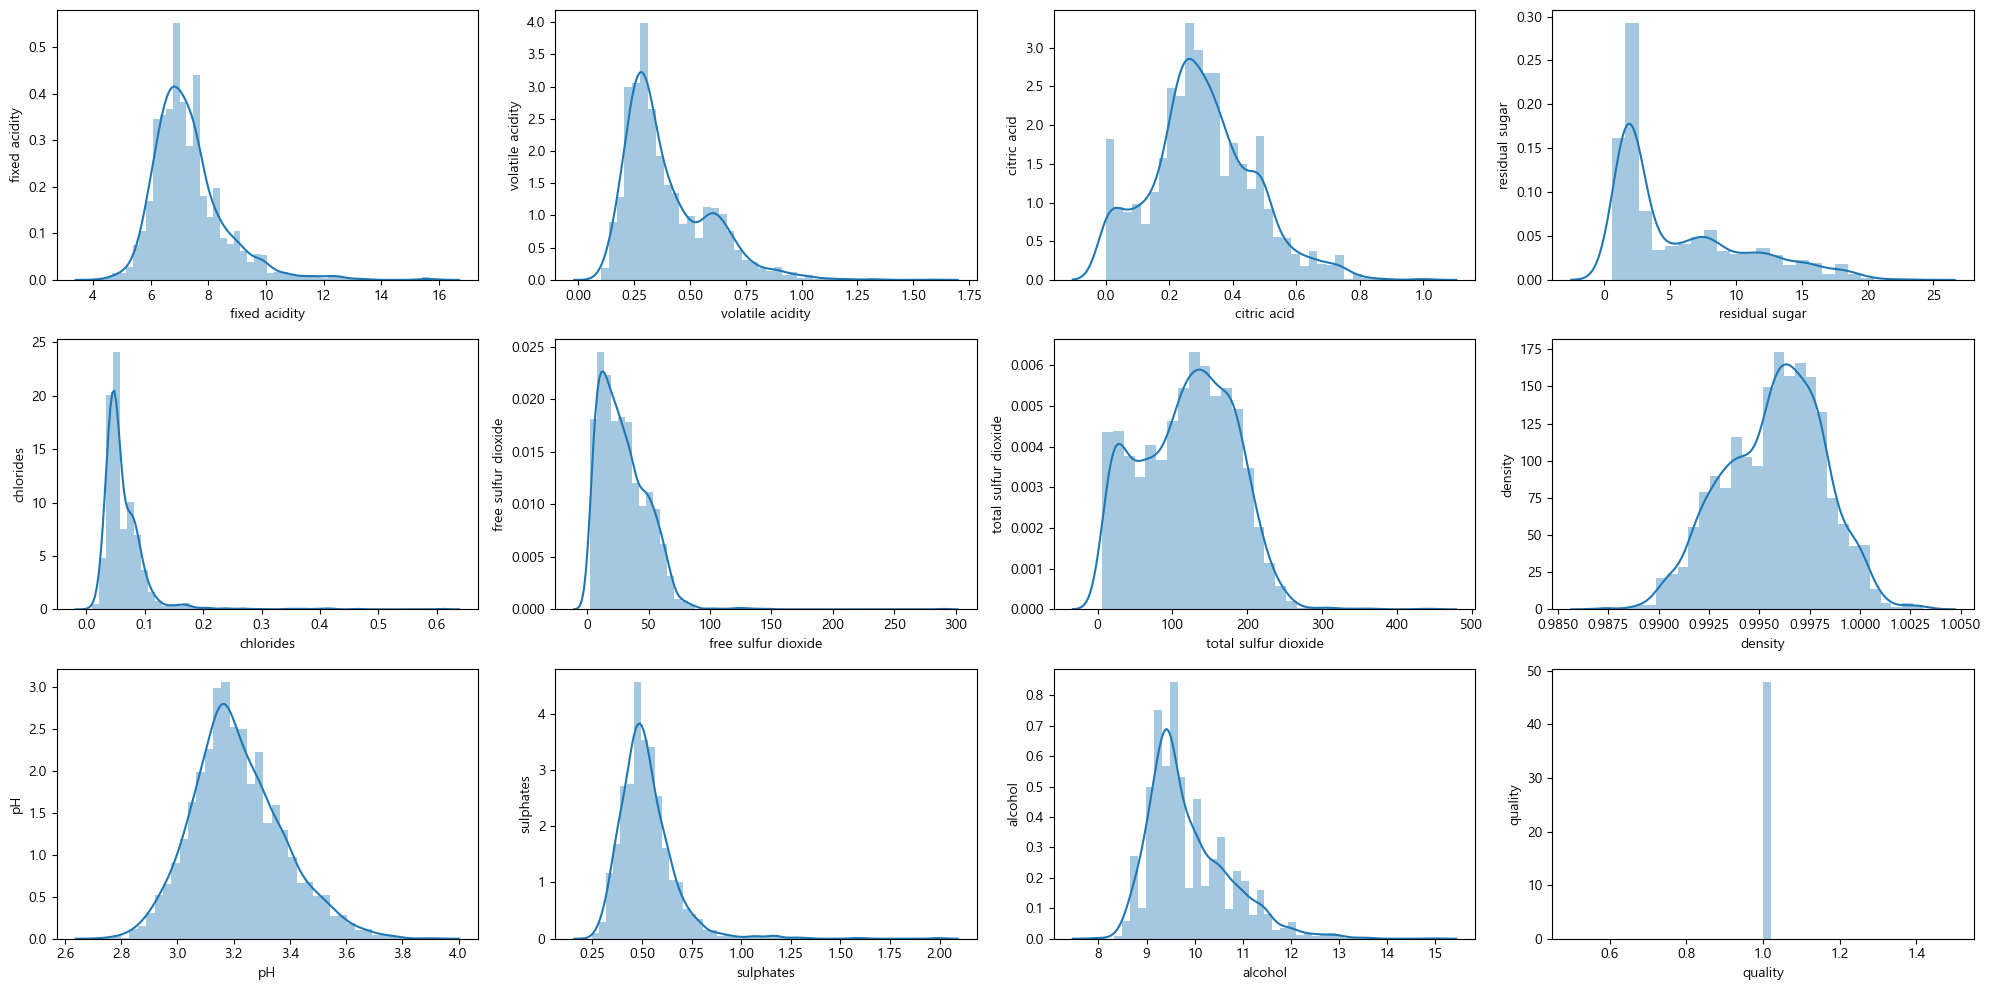

In [16]:
df1=df[df['quality']==1]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df1.iloc[:,i])
    plt.ylabel(df1.columns[i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

품질 1등급 데이터 산포를 확인한 결과, density가 전체 데이터에 비해 고르게 분포되어있고 나머지 변수들은 비슷한 모습을 띄고 있다

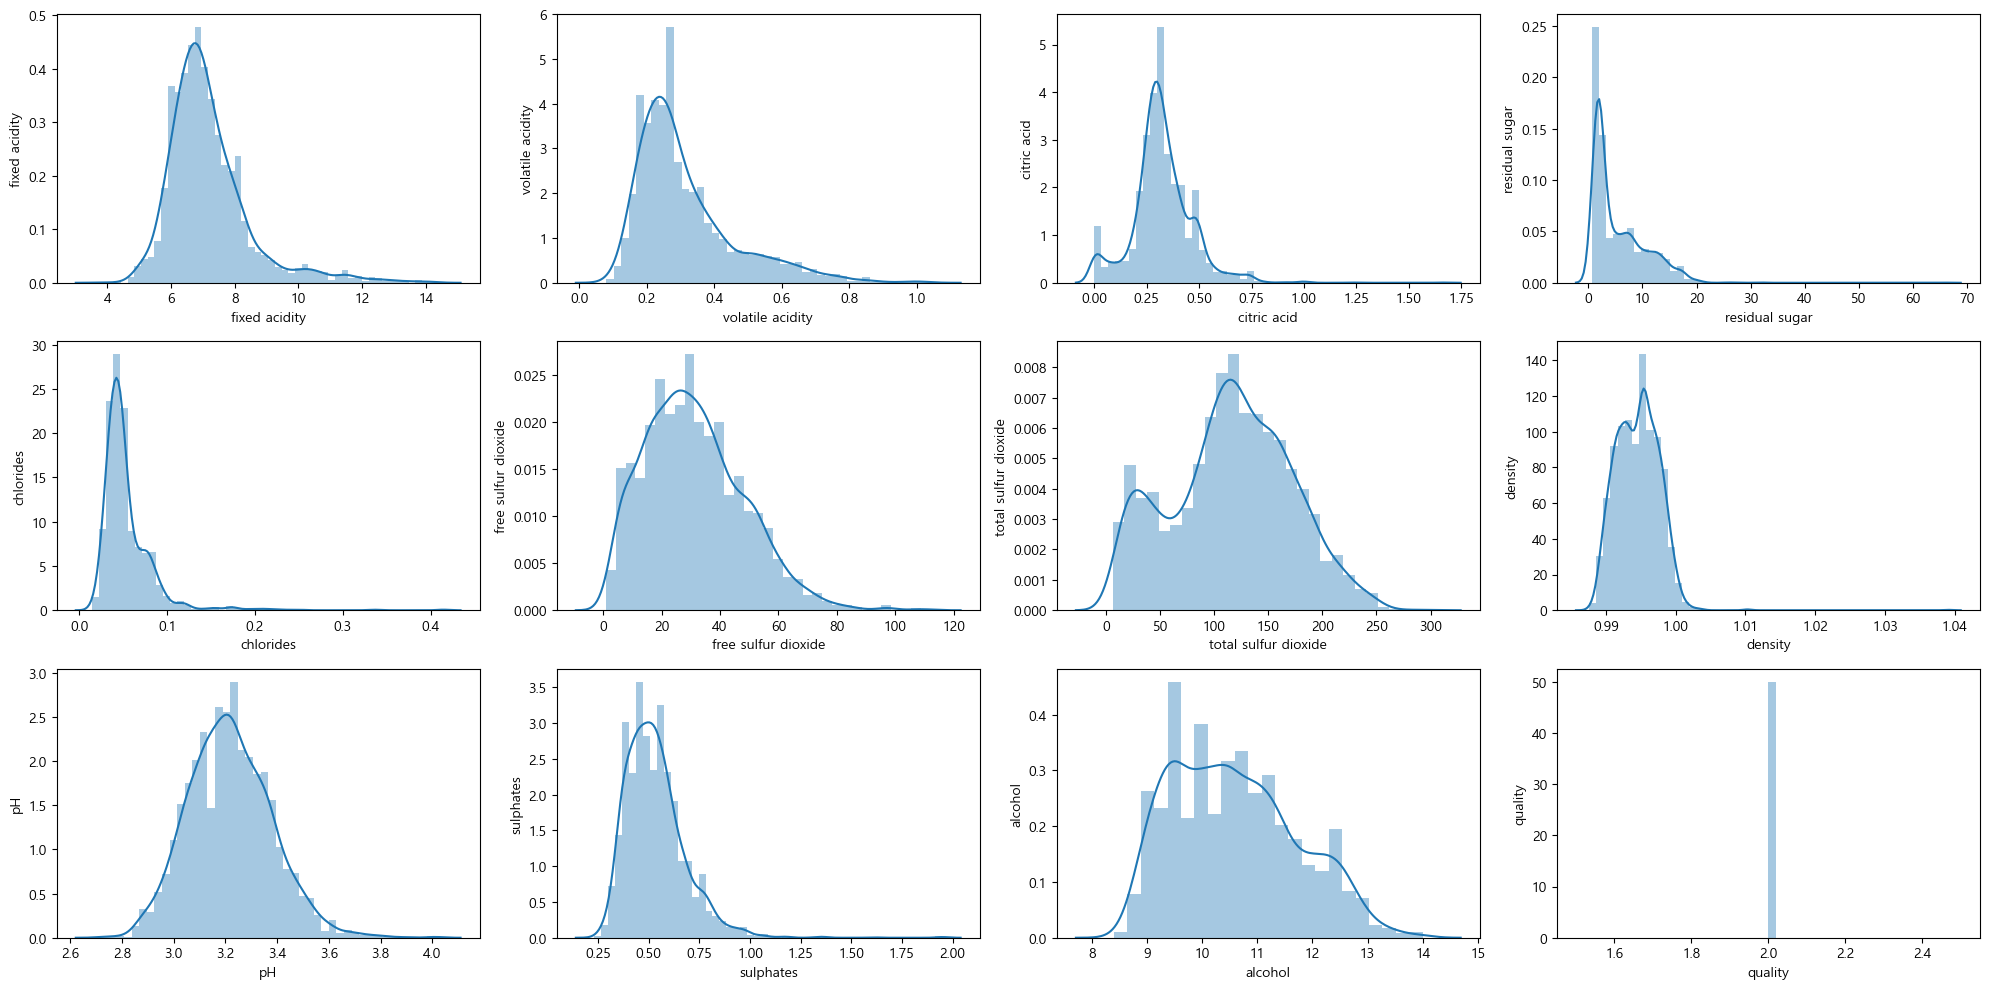

In [17]:
df2=df[df['quality']==2]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df2.iloc[:,i])
    plt.ylabel(df2.columns[i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

품질 2등급 데이터 산포를 확인한 결과, density가 1등급 데이터와 다르게 한쪽으로 치우친 것을 알 수 있고 나머지 변수들은 비슷한 모습을 띄고 있다

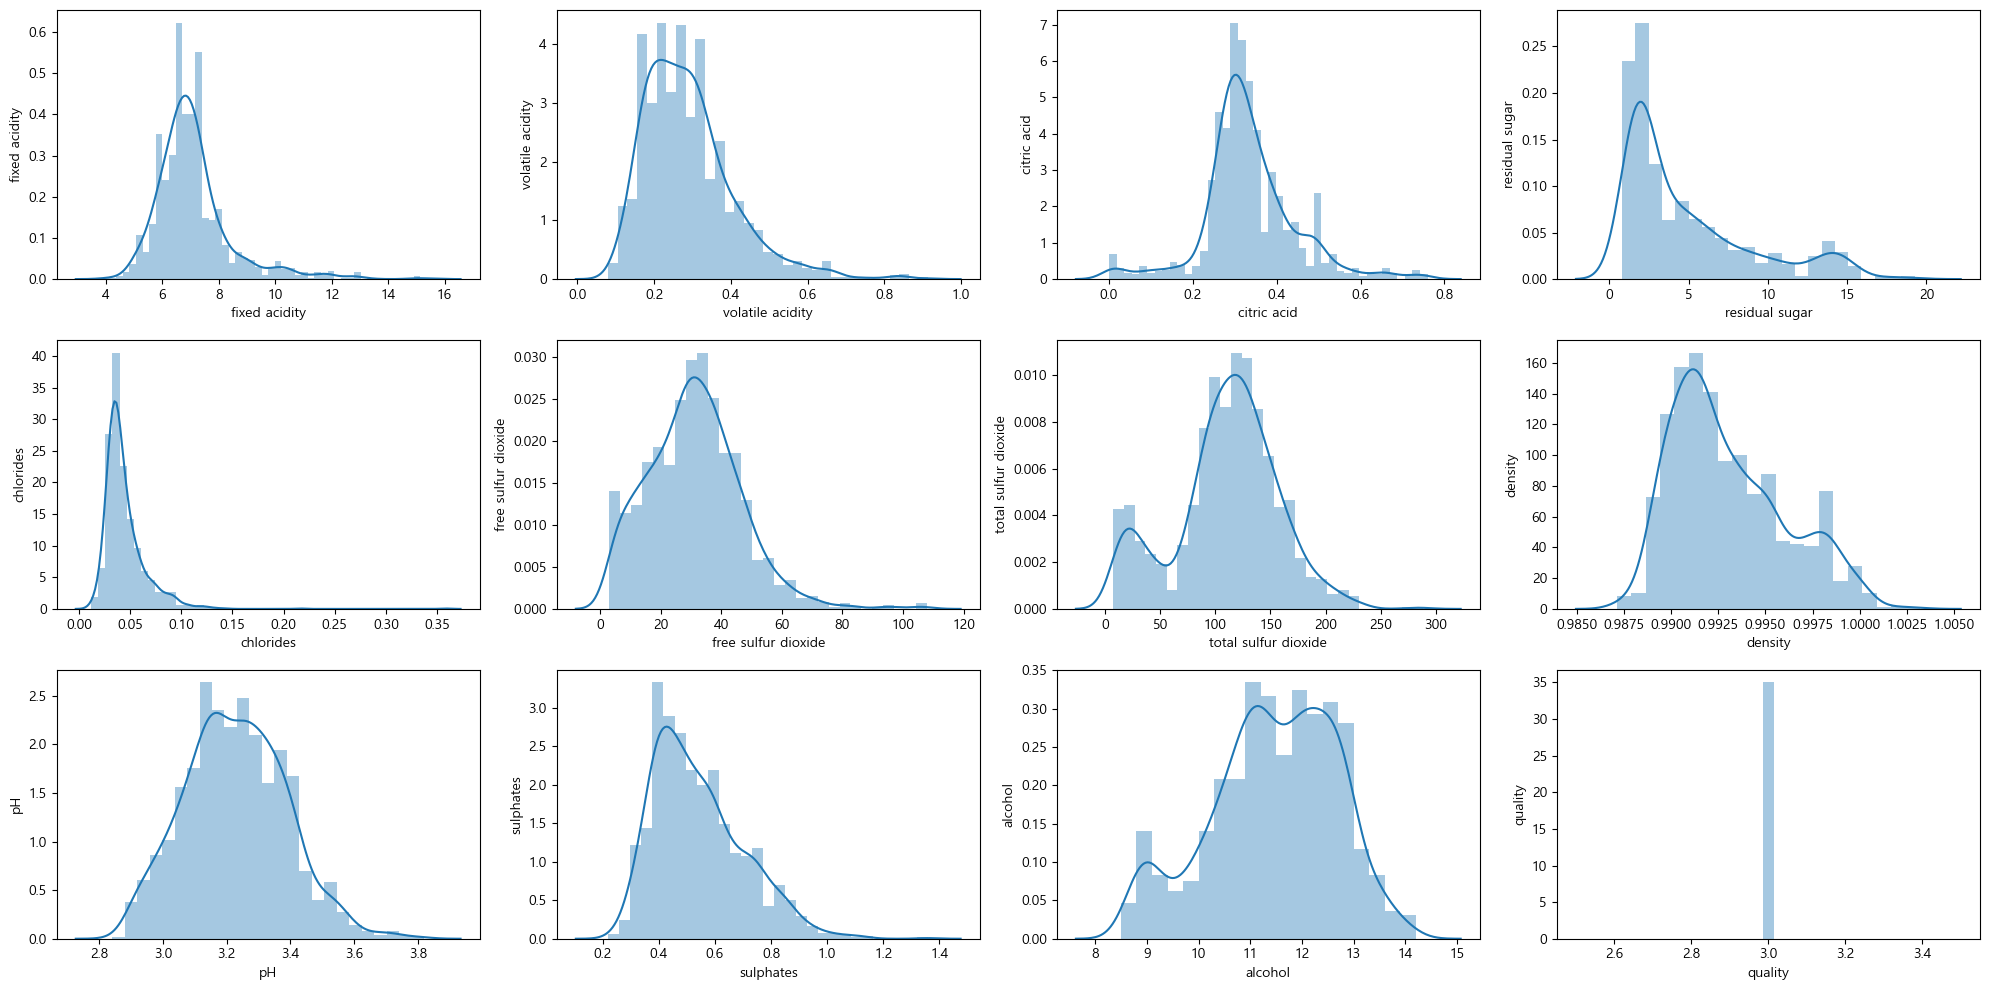

In [18]:
df3=df[df['quality']==3]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df3.iloc[:,i])
    plt.ylabel(df3.columns[i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

품질 3등급 데이터 산포를 확인한 결과, density가 2등급 데이터와 달리 고르게 분포되어있고 나머지 변수들은 비슷한 모습을 띄고 있다

## PCA를 통한 품질 데이터 Scaling

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def pca_feature_var(data, var_ratio) :
    roop_ix=data['quality'].unique()

    fig, ax = plt.subplots(len(roop_ix), 1, figsize = (10, 10))

    for i,x in enumerate(roop_ix):
        df1=data[(data['quality']==x)]
        X=df1.drop(['quality'], axis=1)

        

        scaler = StandardScaler()

        pca = PCA()

        pipeline = make_pipeline(scaler,pca)


        pipeline.fit(X)
        features = range(pca.n_components_)

        feature_df=pd.DataFrame(data=features,columns=['pc_feature'])
        variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
        pc_feature_df=pd.concat([feature_df,variance_df],axis=1)

        cumsum = np.cumsum(pca.explained_variance_ratio_)
        d = np.argmax(cumsum >= var_ratio) + 1
        print('quality:', x ,'/ 선택할 차원 수 :', d, '/ 변수 설명력', cumsum[d-1])
        singular_vector=pd.DataFrame(pca.components_.T,index=X.columns)
        print(singular_vector)
        print("--------------------------------------------------------------------------------------------------------------------------")
        sns.barplot(ax=ax[i], x='pc_feature', y='variance', data=pc_feature_df)
        plt.xlabel('PCA feature')
        plt.ylabel('variance')

1. 차원 축소

- Wine Quality data는 index column과 type('red','white')을 제외하고는 12개의 차원으로 이루어진 데이터다


- 많은 데이터의 컬럼들을 적은 컬럼들로 차원축소하고 데이터를 잘 설명할 수 있게 만들어주는 것이다(데이터 손실이 발생하기 때문에 몇퍼센트 기준을 세우고 그 이상의 설명력을 가지는 차원 수를 정한다, 보통 6~70%로 설정한다)


- 3차원까지는 어느정도 사람이 알아볼 수 있는 데이터이고, 4차원부터는 사람이 데이터를 해석하는 것이 불가능하다


- 여기서는 그래프로 표현할 수 있는 2차원으로 차원을 축소하여 평균으로 부터 멀어진 데이터들을 낮은 품질의 제품으로 판정하고자 한다


- var ratio은 변수 설명력을 의미한다

quality: 1 / 선택할 차원 수 : 2 / 변수 설명력 0.5021112821016063
                            0         1         2         3         4   \
fixed acidity        -0.162490  0.373834  0.443589 -0.318594  0.158819   
volatile acidity     -0.373864  0.185705 -0.278034 -0.169583 -0.121042   
citric acid           0.249655  0.211955  0.508686  0.140954  0.225848   
residual sugar        0.404717  0.212619 -0.195108 -0.227807  0.248177   
chlorides            -0.208530  0.382601  0.002530  0.478848 -0.375295   
free sulfur dioxide   0.424284  0.023057 -0.190288  0.278266  0.063592   
total sulfur dioxide  0.479926 -0.018223 -0.096433  0.232983  0.006013   
density               0.069653  0.566851 -0.229854 -0.290804  0.255879   
pH                   -0.256704 -0.099886 -0.496858  0.117746  0.517767   
sulphates            -0.194687  0.362455  0.012121  0.567605  0.281887   
alcohol              -0.212643 -0.354559  0.289368  0.127910  0.538129   

                            5         6         7        

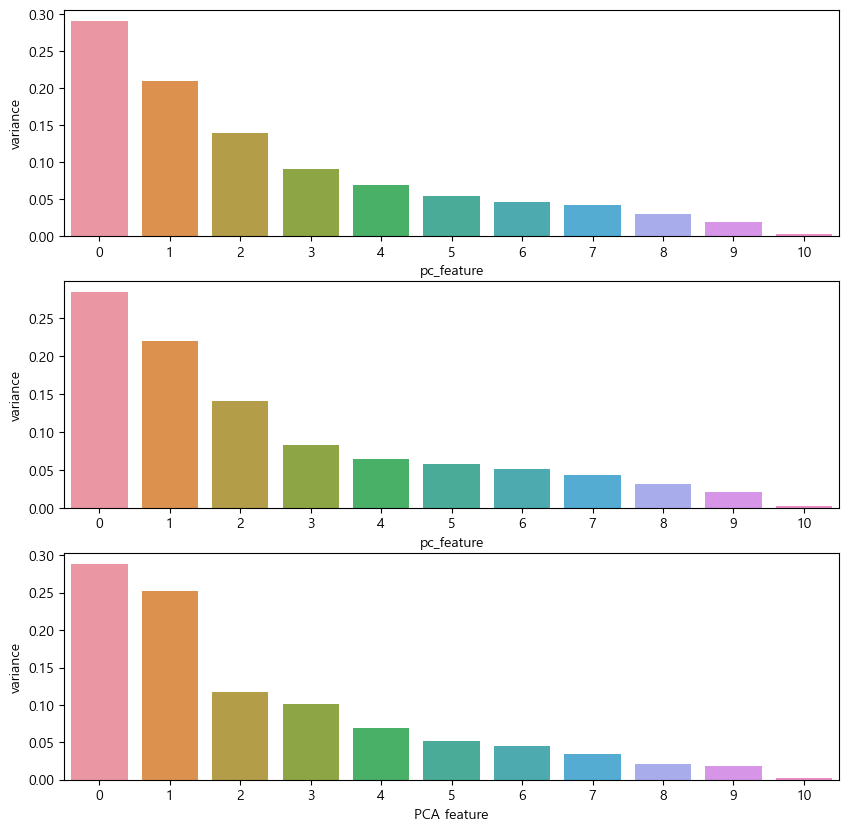

In [21]:
pca_feature_var(df, 0.50)

차원을 2개만 선택해도 변수 설명력이 50%를 넘는 것을 확인할 수 있다

In [22]:
 def pca_plot(df,y) :
        
        x=df.drop(['quality'], axis=1).reset_index(drop=True)
        y=df[y].reset_index(drop=True)

        X_ = StandardScaler().fit_transform(x)

        pca = PCA(n_components=2)
        pc = pca.fit_transform(X_)

        pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
        pc_df=pd.concat([pc_df,y],axis=1)

        plt.rcParams['figure.figsize'] = [10, 10]
        sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=100, linewidth=0)

reset index 하는 이유는 concat/merge 할 때 인덱스가 같아야 합칠 수 있기 때문이다

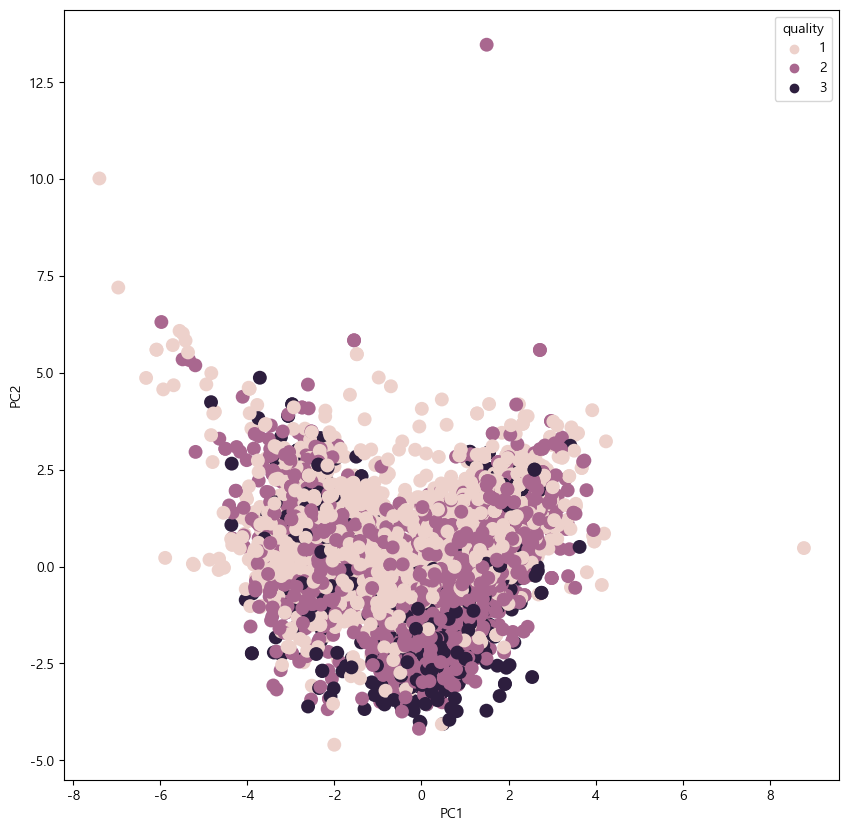

In [23]:
pca_plot(df,'quality')

차원 축소된 데이터를 2차원 그래프로 표현한 결과

- 같은 Quality group에 속해있는 Wine 상품들은 동일한 Spec으로 생산되어져야 공정능력이 관리된다고 할 수 있다


- Wine 공정 변수에 Target Spec에서 멀어진(평균과 거리가 떨어진) 정도가 큰 변수일 수록 공정관리가 필요한 변수이다


- (0,0) 중심에 모여있는 데이터들은 각 공정변수의 평균과 가까운 데이터이다


- (0,0) 중심에서 떨어진 데이터일수록 각 공정변수의 평균과 멀어진, 즉 산포가 큰 데이터이다

In [25]:
def pca_plot_prod(data) :
    roop_ix=data['quality'].unique()
    fig, ax = plt.subplots(len(roop_ix), 1, figsize = (5, 10))
    
    for i,x in enumerate(roop_ix):

            print("Fig.",i+1,": ",x)

 
            df1=data[(data['quality']==x)]
            X=df1.drop(['quality'], axis=1)
            y=df1.quality

            X_ = StandardScaler().fit_transform(X)

            pca = PCA(n_components=2)
            pc = pca.fit_transform(X_)

            pc_df=pd.DataFrame(pc,columns=['PC1','PC2'])
    
            pc_df['quality']=x

            sns.scatterplot(ax=ax[i],data=pc_df,x='PC1',y='PC2', legend='brief', s=50, linewidth=0)

Fig. 1 :  1
Fig. 2 :  2
Fig. 3 :  3


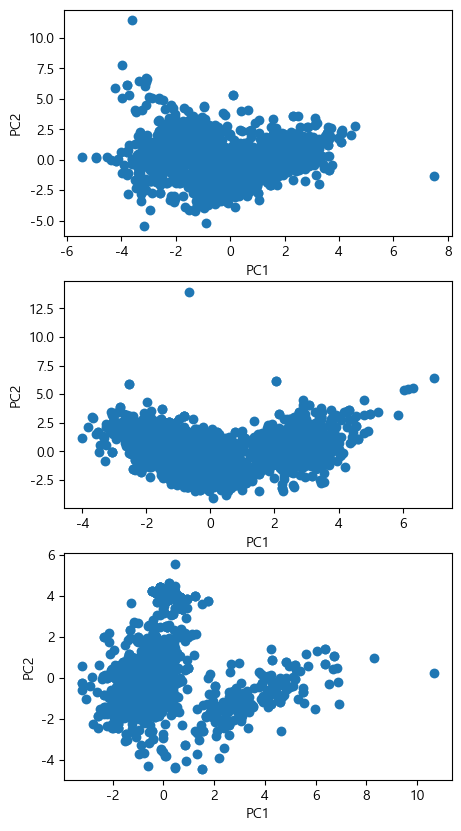

In [26]:
pca_plot_prod(df)

품질별 그래프로 확인한 결과, (0,0) 중심에서 떨어진 데이터들이 더욱 잘 보이는 것을 알 수 있고 공정관리가 필요해보인다

## 품질 등급화

In [27]:
df1=df[(df['quality']==1)]
X=df1.drop(['quality'], axis=1)
X_ = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

pc_df=pd.DataFrame(pc,columns=['PC1','PC2'])


df1_concat = pd.concat([df1.reset_index(drop=True), pc_df], axis=1)

In [28]:
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915


품질 등급을 부여하기 위해, PC1값과 PC2값을 기존 데이터에 concat을 실시한다

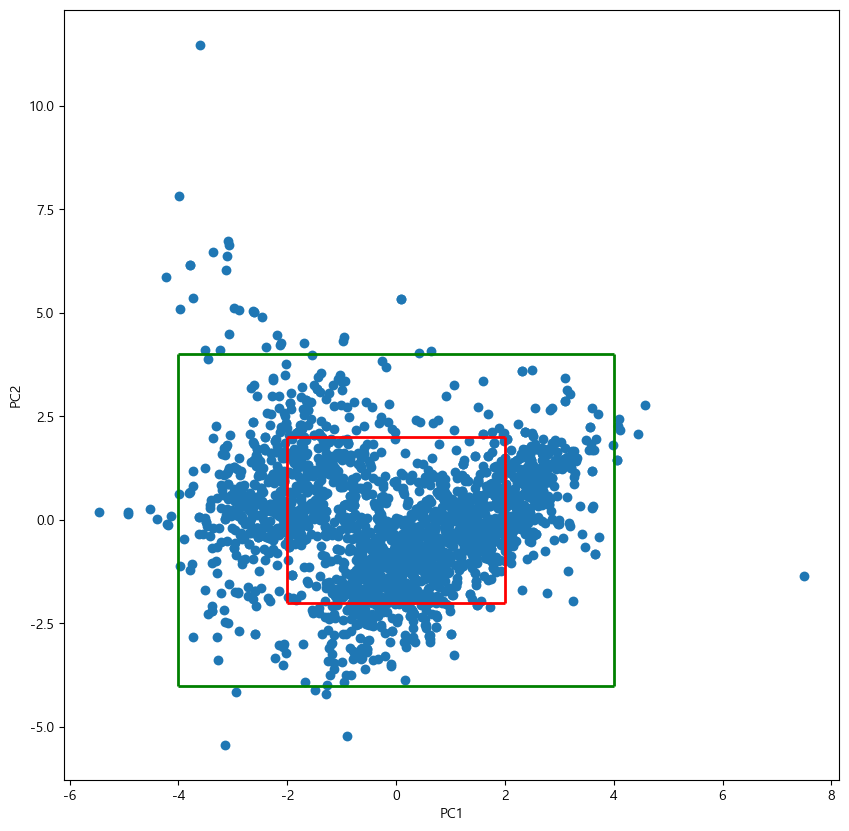

In [29]:
sns.scatterplot(data=df1_concat,x='PC1',y='PC2', s=50, linewidth=0);

plt.vlines(-2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.vlines(2, ymin=-2, ymax=2, color='r', linewidth=2);

plt.hlines(-2, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(2, xmin=-2, xmax=2, color='r', linewidth=2);

plt.vlines(-4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.vlines(4, ymin=-4, ymax=4, color='g', linewidth=2);

plt.hlines(-4, xmin=-4, xmax=4, color='g', linewidth=2);
plt.hlines(4, xmin=-4, xmax=4, color='g', linewidth=2);

plt.gcf().set_size_inches(10, 10)

PC1, PC2인 차원 축소 변수 2, -2를 기준으로 등급을 부여한다

In [30]:
df1_concat['grade'] = np.where( (df1_concat['PC1']>-2) & (df1_concat['PC1']<2) & (df1_concat['PC2']>-2) & (df1_concat['PC2']<2), 'A', 
                               np.where((df1_concat['PC1']>-4) & (df1_concat['PC1']<4) & (df1_concat['PC2']>-4) & (df1_concat['PC2']<4), 'B', 'C') )
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667,B
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915,B


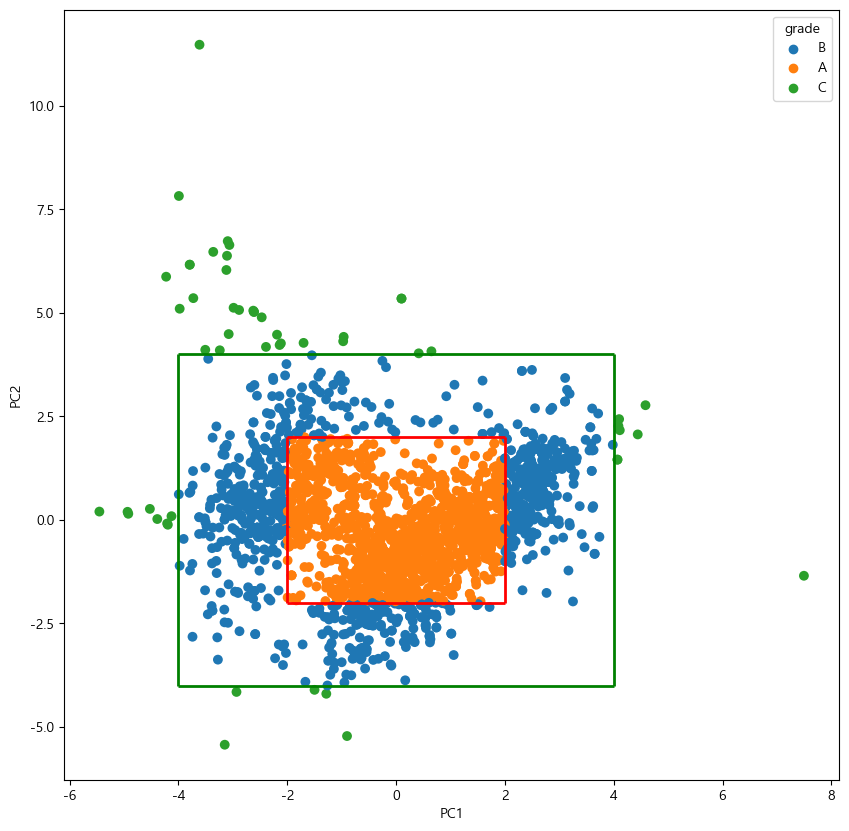

In [31]:
sns.scatterplot(data=df1_concat,x='PC1',y='PC2', s=50, linewidth=0, hue='grade');

plt.vlines(-2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.vlines(2, ymin=-2, ymax=2, color='r', linewidth=2);

plt.hlines(-2, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(2, xmin=-2, xmax=2, color='r', linewidth=2);

plt.vlines(-4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.vlines(4, ymin=-4, ymax=4, color='g', linewidth=2);

plt.hlines(-4, xmin=-4, xmax=4, color='g', linewidth=2);
plt.hlines(4, xmin=-4, xmax=4, color='g', linewidth=2);

plt.gcf().set_size_inches(10, 10)

PCA 구분선을 기반으로 A, B, C 등급을 부여한다

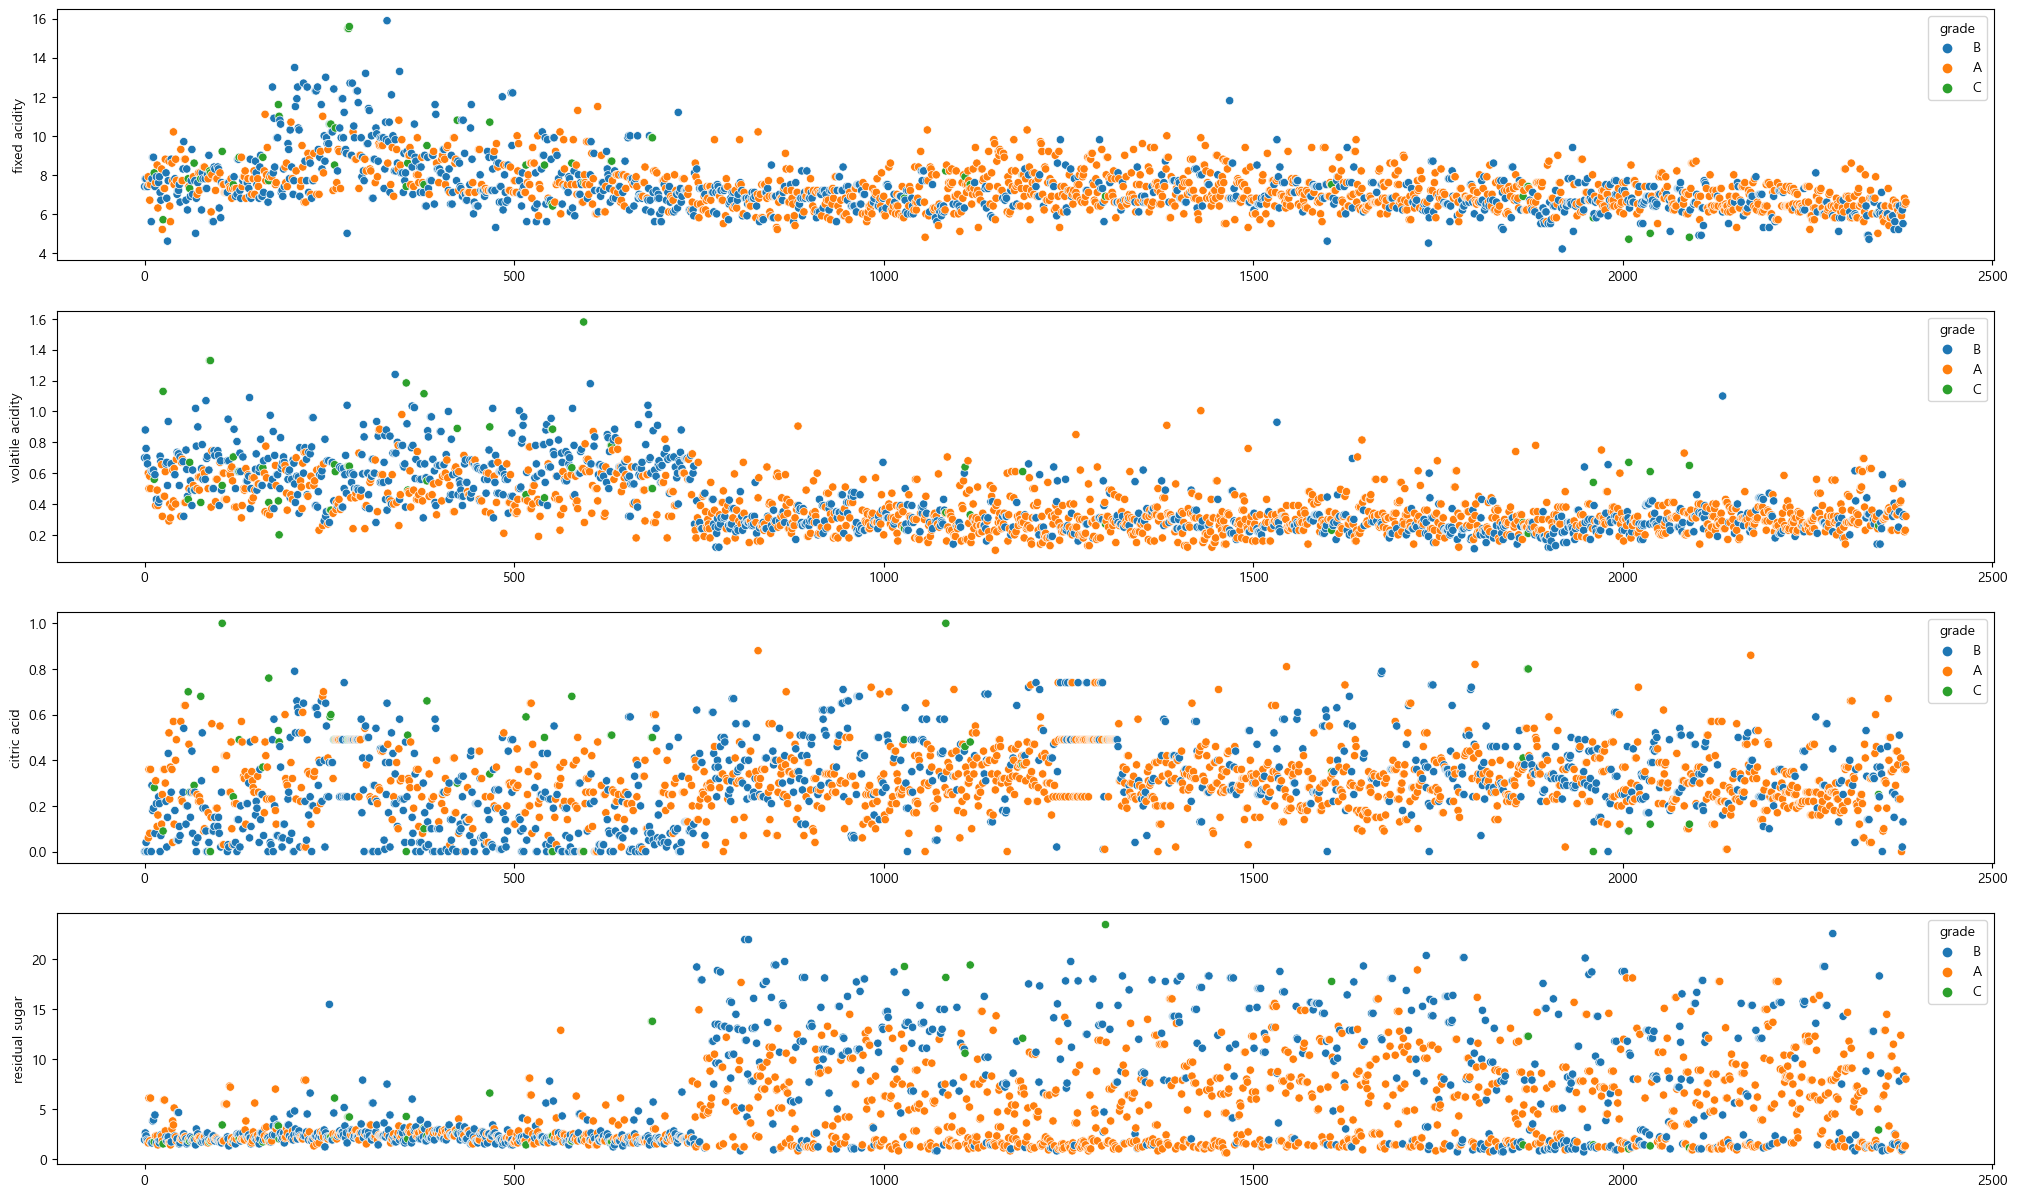

In [32]:
fig, axes = plt.subplots(4, 1)
sns.scatterplot(x=df1_concat.index, y=df1_concat['fixed acidity'], hue = df1_concat['grade'], ax=axes[0]);
sns.scatterplot(x=df1_concat.index, y=df1_concat['volatile acidity'], hue = df1_concat['grade'], ax=axes[1]);
sns.scatterplot(x=df1_concat.index, y=df1_concat['citric acid'], hue = df1_concat['grade'], ax=axes[2]);
sns.scatterplot(x=df1_concat.index, y=df1_concat['residual sugar'], hue = df1_concat['grade'], ax=axes[3]);
plt.gcf().set_size_inches(25, 15)

1등급의 Wine이라도 C등급은 모든 공정변수 기준으로 평균값(center) 값에서 멀어지는 경향이 크다

In [33]:
df = df1_concat.copy()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X=df.drop(['quality', 'PC1', 'PC2', 'grade'], axis=1)
Y=df['grade']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1668, 11)
(1668,)
(716, 11)
(716,)


In [35]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=6, random_state = 2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           A       0.91      0.99      0.95       938
           B       0.96      0.87      0.91       693
           C       1.00      0.59      0.75        37

    accuracy                           0.93      1668
   macro avg       0.96      0.82      0.87      1668
weighted avg       0.93      0.93      0.93      1668

              precision    recall  f1-score   support

           A       0.87      0.94      0.90       402
           B       0.87      0.82      0.85       298
           C       1.00      0.12      0.22        16

    accuracy                           0.87       716
   macro avg       0.91      0.63      0.66       716
weighted avg       0.87      0.87      0.86       716



In [36]:
pd.Series(y_pred_test).value_counts()

A    435
B    279
C      2
dtype: int64

1. precision  

- 예측한 것 중에 실제로 정답인 비율


2. recall  

- 실제 정답 중에서 예측으로 맞춘 비율

3. support

- 435개 중에 87%를 맞춘 것(precision - A)

- 402명 중에 94%를 맞춘 것(recall- A)

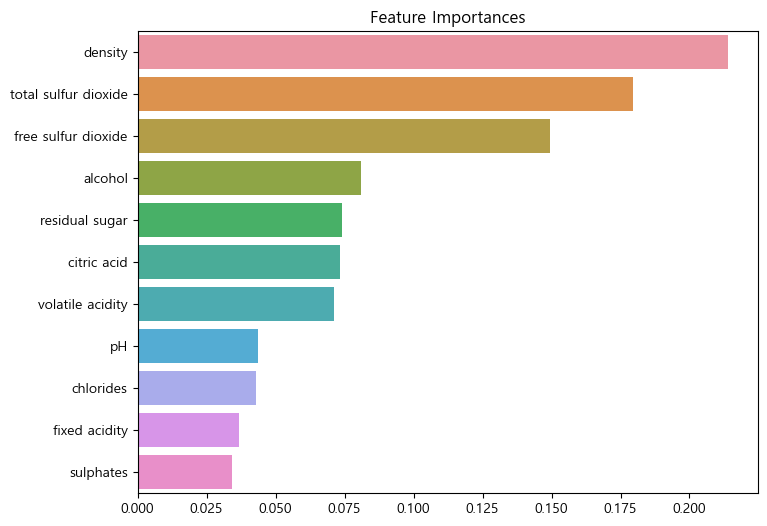

In [37]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, 1등급 와인은 density(밀도)가 맛의 변화를 일으키는 가장 중요한 변수임을 확인할 수 있다. 따라서 density(밀도)를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

해당 데이터는 모든 변수가 중요성을 띄고 있으므로 하위 변수들을 제거하고 다시 모델링하는 것은 좋지않다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 모델을 활용해서 주요인자를 Control 전/후 필드 불량률을 비교하고, 생산 공정 Target spec을 Tight하게 적용 했을 때 기존 대비 검사 통과율을 비교하는 것이다